In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway, kruskal

# --- Plot Style ---
sns.set(style="whitegrid")
%matplotlib inline

Load Cleaned Datasets

In [6]:
# Load the cleaned datasets
benin = pd.read_csv("./data/benin_clean.csv")
sierra_leone = pd.read_csv("./data/sierraleone_clean.csv")
togo = pd.read_csv("./data/togo_clean.csv")

# Add a column to identify each country
benin["Country"] = "Benin"
sierra_leone["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine all datasets
df = pd.concat([benin, sierra_leone, togo], ignore_index=True)

df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country,GHIrsi
0,2021-08-09 00:01:00,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin,NaN
1,2021-08-09 00:02:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin,NaN
2,2021-08-09 00:03:00,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin,NaN
3,2021-08-09 00:04:00,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,0.4,120.3,1.3,997,0,0.0,26.4,26.3,Benin,NaN
4,2021-08-09 00:05:00,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,0.3,113.2,1.0,997,0,0.0,26.4,26.3,Benin,NaN


Boxplots for Each Metric (GHI, DNI, DHI)

C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_12516\2377468391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df, palette="Set2")


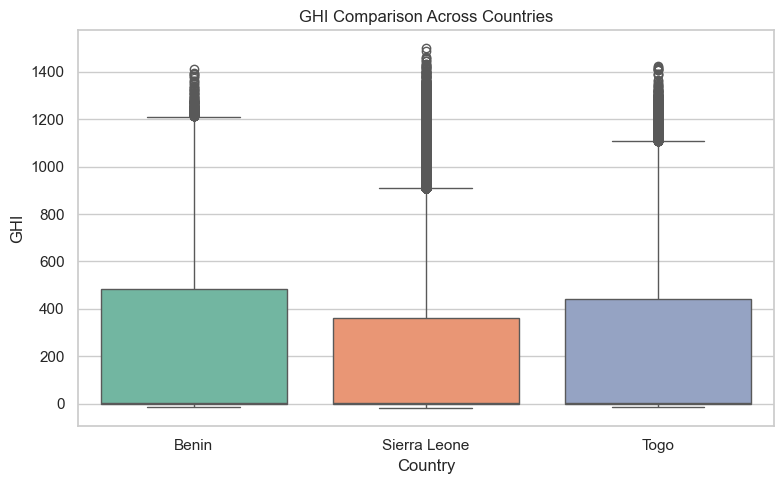

C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_12516\2377468391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df, palette="Set2")


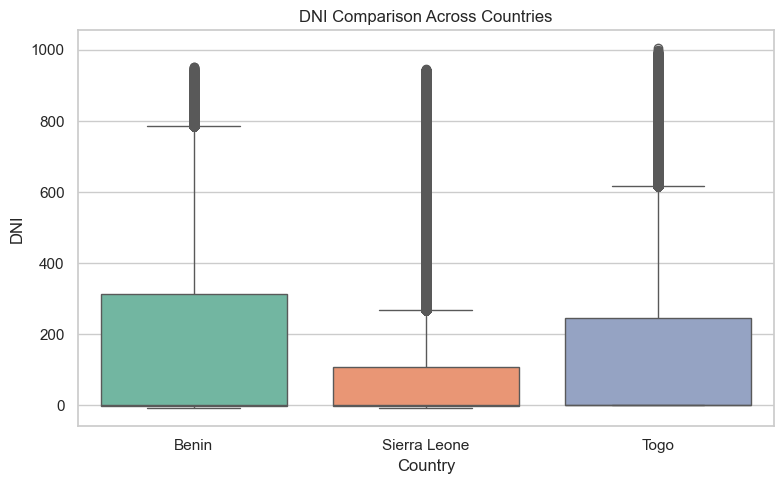

C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_12516\2377468391.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Country", y=metric, data=df, palette="Set2")


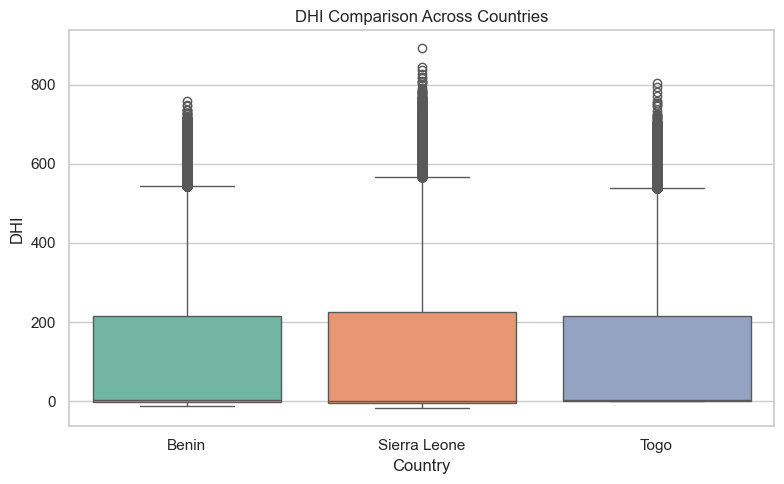

In [7]:
metrics = ["GHI", "DNI", "DHI"]

for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x="Country", y=metric, data=df, palette="Set2")
    plt.title(f"{metric} Comparison Across Countries")
    plt.ylabel(metric)
    plt.xlabel("Country")
    plt.tight_layout()
    plt.show()

Summary Table – Mean, Median, Standard Deviation

In [8]:
summary = df.groupby("Country")[["GHI", "DNI", "DHI"]].agg(["mean", "median", "std"]).round(2)
summary

GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

Statistical Test: One-Way ANOVA or Kruskal-Wallis

In [9]:
# Extract GHI values per country
ghi_benin = benin["GHI"]
ghi_sierra = sierra_leone["GHI"]
ghi_togo = togo["GHI"]

# One-Way ANOVA (assumes normality and equal variances)
anova_result = f_oneway(ghi_benin, ghi_sierra, ghi_togo)

# Kruskal-Wallis (non-parametric alternative)
kruskal_result = kruskal(ghi_benin, ghi_sierra, ghi_togo)

print("One-way ANOVA p-value:", anova_result.pvalue)
print("Kruskal–Wallis p-value:", kruskal_result.pvalue)

One-way ANOVA p-value: 0.0
Kruskal–Wallis p-value: 0.0


Key Observations

1, Benin exhibits the highest mean GHI (240.56), but also shows the largest variability (standard deviation of 331.13), suggesting inconsistent solar irradiance that may affect solar energy reliability.

2, Sierra Leone shows the lowest GHI and DNI values (mean GHI: 201.96, mean DNI: 116.38), which could indicate lower solar energy potential compared to Benin and Togo.

3, Both ANOVA and Kruskal-Wallis tests show p-values of 0.0, confirming that the differences in GHI across countries are statistically significant.

4, **Togo** has the highest median GHI (2.1) and the highest median DNI (0.0) among the three countries, with a relatively lower standard deviation in GHI and DNI than Benin. This suggests a more stable and predictable solar resource, making it a potentially better candidate for consistent solar panel performance.
Since Togo has Reliable Performance Potential Which is High and stable DHI and DNI values suggest balanced diffuse and direct sunlight, which is beneficial for both PV and CSP technologies It is best for a solar farm investment..

(optional)Bar Chart of Average GHI per Country

C:\Users\Tinsae D.D\AppData\Local\Temp\ipykernel_12516\1082681981.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="coolwarm")


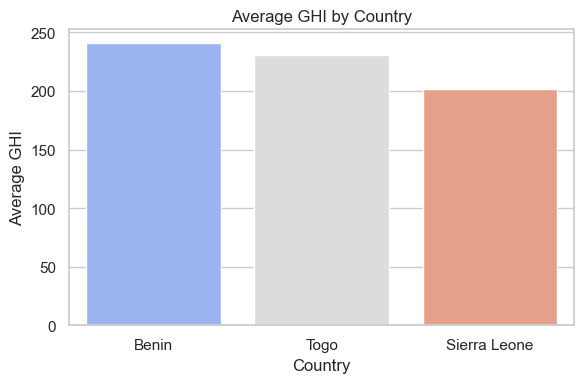

In [10]:
# Calculate average GHI
avg_ghi = df.groupby("Country")["GHI"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette="coolwarm")
plt.title("Average GHI by Country")
plt.ylabel("Average GHI")
plt.xlabel("Country")
plt.tight_layout()
plt.show()